In [45]:
import pathlib

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
DATA = pathlib.Path("../data")
CATEGORIES_DATA = DATA / "raw" / "categories.csv"
EVENTS_DATA = DATA / "raw" / "events.csv"
BUYER_DATA = DATA / "raw" / "rec_aaa_buyer_stream.pq"
DESC_DATA = DATA / "raw" / "rec_aaa_title_desc.pq"

# Обзор данных

In [5]:
buyer_stream = pd.read_parquet(BUYER_DATA)
buyer_stream

,user_id,event_date,eid,category_id,microcat_id,internal_item_id,item_id,user_hash,x
0,257315,2024-09-04 21:19:26,857,21,3754,1877586001546,4458236034,36,8.046691e+12
1,257315,2024-09-05 08:34:33,4675,21,3754,1877586001546,4458236034,36,NaN
2,257315,2024-09-12 16:45:55,857,38,2300517,1885652000213,4239010992,36,NaN
3,257315,2024-09-12 17:02:20,4675,38,2300517,1885652000213,4239010992,36,8.090721e+12
4,257315,2024-09-17 15:01:53,4675,27,1178078,1874523000292,4188497140,36,8.118833e+12
...,...,...,...,...,...,...,...,...,...
66542,1684577250014,2024-10-20 18:34:01,4675,36,306,1876159755235,4275756625,38,NaN
66543,1685373250010,2024-10-10 04:59:49,857,27,1178078,1924574750264,4320563474,28,8.232791e+12
66544,1693726750023,2024-10-17 10:13:15,4675,27,1144493,1845806750119,3975922435,0,8.266678e+12
66545,1693726750023,2024-10-17 16:32:14,857,27,1144493,1845806750119,3975922435,0,NaN


In [6]:
buyer_stream.describe()

,user_id,event_date,eid,category_id,microcat_id,internal_item_id,item_id,user_hash,x
count,6.654700e+04,66547,66547.000000,66547.000000,6.654700e+04,6.654700e+04,6.654700e+04,66547.000000,5.553100e+04
mean,6.320714e+11,2024-10-01 15:34:08.933836288,2648.349693,41.201301,9.686382e+05,1.745263e+12,3.945534e+09,24.846274,8.189034e+12
min,1.585000e+04,2024-09-01 00:01:45,303.000000,9.000000,1.800000e+01,3.150962e+07,1.176663e+07,0.000000,8.023696e+12
25%,1.762705e+11,2024-09-18 22:03:50.500000,857.000000,27.000000,7.790000e+02,1.682419e+12,3.805483e+09,13.000000,8.127542e+12
50%,6.130968e+11,2024-10-03 14:00:48,857.000000,27.000000,1.144493e+06,1.864097e+12,4.182358e+09,26.000000,8.200818e+12
75%,1.012876e+12,2024-10-15 15:40:04,4675.000000,36.000000,2.059400e+06,1.906620e+12,4.336789e+09,37.000000,8.258444e+12
max,1.702546e+12,2024-10-25 23:59:00,6154.000000,116.000000,2.301614e+06,1.938426e+12,4.866410e+09,49.000000,8.310878e+12
std,4.947503e+11,NaN,2111.662373,30.194505,9.040633e+05,2.714271e+11,6.631435e+08,14.281167,7.955602e+10


In [7]:
buyer_stream.eid.nunique()

10

In [28]:
buyer_stream.columns

Index(['user_id', 'event_date', 'eid', 'category_id', 'microcat_id',
       'internal_item_id', 'item_id', 'user_hash', 'x'],
      dtype='object')

In [8]:
title_desc = pd.read_parquet(DESC_DATA)
title_desc

,Item_id,Title,t_rn,DescriptionRu,d_rn
0,238750565,Сход-развал развал схождения hanter 3D,1,"Развал-схождения 3D качественно, большой опыт....",1
1,298854720,Новые Beats Powerbeats Pro Cloud Pink от Apple,1,Продам НОВЫЕ Беспроводные наушники с микрофоно...,1
2,10409000978,Новые джинсы - капри белые,1,Джинсы (капри) новые растягиваются (стрейч). О...,1
3,14669000687,Подкрылки передние honda accord 7,1,Продается передний правый подкрылок на HONDA A...,1
4,22767000267,Цепочка. Серебро 925 пробы,1,❗Не отправляю. Только самовывоз. \nЦепочка тон...,1
...,...,...,...,...,...
435350,1938157500143,Дверь входная металлическая левая бу 80*200,1,Дверь входная металлическая левая бу 80*200 с ...,1
435351,1938160251614,Пуховик женский xxl,1,"Женская зимняя,\nкрасивая куртка,нежно мятного...",1
435352,1938170500642,Ботинки мужские зимние 43 размер salamander,1,Полуботинки зимние Salamander новые Натуральн...,1
435353,1938201250163,Пуховик женский 48 бу,1,"Пуховик женский, зелёный. С мехом песца (мех н...",1


In [29]:
title_desc.columns

Index(['Item_id', 'Title', 't_rn', 'DescriptionRu', 'd_rn'], dtype='object')

In [9]:
title_desc.describe()

,Item_id,t_rn,d_rn
count,4.353550e+05,435355.0,435355.0
mean,1.744211e+12,1.0,1.0
std,2.717580e+11,0.0,0.0
min,7.526000e+03,1.0,1.0
25%,1.680174e+12,1.0,1.0
50%,1.863519e+12,1.0,1.0
75%,1.907567e+12,1.0,1.0
max,1.938492e+12,1.0,1.0


In [10]:
print(title_desc["t_rn"].unique())
print(title_desc["d_rn"].unique())

[1]
[1]


In [11]:
categories = pd.read_csv(CATEGORIES_DATA)
categories

,microcat_id,microcat_ext,microcat_name,is_active_microcat,level_id,level_name,parent_microcat_id,logcat_id,vertical_id,vertical,...,Param1_microcat_id,Param1,Param2_microcat_id,Param2,Param3_microcat_id,Param3,Param4_microcat_id,Param4,launch_id,version_id
0,1,6020,Камбоджа,True,7,Param4,7514,3.683885e+11,500014.0,Realty,...,4730.0,Сдам,3.300000e+01,"Гараж, машиноместо",7.514000e+03,На длительный срок,1.0,Камбоджа,16164522,627
1,3,5220,Норвегия,True,6,Param3,1123,3.683425e+11,500014.0,Realty,...,3439.0,Куплю,1.123000e+03,Коммерческая недвижимость,3.000000e+00,Норвегия,NaN,NaN,16164522,627
2,6,4472,Хорватия,True,6,Param3,2934,3.683765e+11,500014.0,Realty,...,6404.0,Продам,2.934000e+03,Коммерческая недвижимость,6.000000e+00,Хорватия,NaN,NaN,16164522,627
3,8,5272,Люксембург,True,6,Param3,7026,3.683425e+11,500014.0,Realty,...,3439.0,Куплю,7.026000e+03,"Дом, вилла",8.000000e+00,Люксембург,NaN,NaN,16164522,627
4,14,6820,Мальта,True,7,Param4,7459,3.683405e+11,500014.0,Realty,...,2020.0,Сниму,3.262000e+03,Земельный участок,7.459000e+03,Посуточно,14.0,Мальта,16164522,627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12713,691801250001,2301749,Тенты и крышки,True,6,Param3,617211750001,3.717485e+11,500005.0,Goods,...,845.0,Прицепы,6.172118e+11,Запчасти и комплектующие,6.918013e+11,Тенты и крышки,NaN,NaN,16164522,627
12714,691802750001,2301746,Крепление,True,6,Param3,617211750001,3.717485e+11,500005.0,Goods,...,845.0,Прицепы,6.172118e+11,Запчасти и комплектующие,6.918028e+11,Крепление,NaN,NaN,16164522,627
12715,691807250001,2301748,Электроника и свет,True,6,Param3,617211750001,3.717485e+11,500005.0,Goods,...,845.0,Прицепы,6.172118e+11,Запчасти и комплектующие,6.918073e+11,Электроника и свет,NaN,NaN,16164522,627
12716,691877000001,2301743,Детали подвески,True,6,Param3,617211750001,3.717485e+11,500005.0,Goods,...,845.0,Прицепы,6.172118e+11,Запчасти и комплектующие,6.918770e+11,Детали подвески,NaN,NaN,16164522,627


In [30]:
categories.columns

Index(['microcat_id', 'microcat_ext', 'microcat_name', 'is_active_microcat',
       'level_id', 'level_name', 'parent_microcat_id', 'logcat_id',
       'vertical_id', 'vertical', 'logical_category_id', 'logical_category',
       'cat_id', 'category_id', 'category_microcat_id', 'category_name',
       'category_slug', 'subcategory_id', 'subcategory_microcat_id',
       'subcategory_name', 'subcategory_slug', 'Param1_microcat_id', 'Param1',
       'Param2_microcat_id', 'Param2', 'Param3_microcat_id', 'Param3',
       'Param4_microcat_id', 'Param4', 'launch_id', 'version_id'],
      dtype='object')

In [12]:
events = pd.read_csv(EVENTS_DATA)
events

,EventType_id,EventType_ext,Name,NameEn,IsActive,ViewType,LogLevel,Slug,Tag,Comment,IsPageView,IsContact,IsCritical,Unit,ViewTypeChangeTime,launch_id,occured_60d,delete_time,importance,version_id
0,1,114,Пользовательские события / Другие / Просмотр к...,Categories Map,True,page_view,traffic,view_categories,clickstream.events,NaN,True,False,False,BuyerX,2021-09-16T00:31:39.101260,16164522,True,NaN,other,580
1,2,226,Пользовательские события / Учетная запись поль...,User Edit Email,True,page_view,traffic,user_changeemailrequest,clickstream.events,Пользовательские события / Учетная запись поль...,True,False,True,AvitoID,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
2,3,210,Пользовательские события / Учетная запись поль...,User Login,True,page_view,traffic,user_login,clickstream.events,Событие попытки авторизации пользователем. В ...,True,False,True,T&S,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
3,4,402,Пользовательские события / Закладки / Удаление...,Favorites Item Remove,True,other,traffic,favorite_remove,clickstream.events,Удалить объявление из избранного,False,False,True,Decision,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
4,5,162,Пользовательские события / Email / Пользовател...,Email Click,True,page_view,traffic,email_click,clickstream.events,NaN,True,False,False,NaN,2021-09-16T00:31:39.101260,16164522,True,NaN,other,580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8549,557218500001,13193,Изменение переключателя 5% пожертования,babushki_toggle_change,True,other,dds,babushki_toggle_change,clickstream.events,Изменение переключателя 5% пожертования на стр...,False,False,False,Tariffs/Transaction,2024-11-08T00:33:49.327819,16164522,True,NaN,other,580
8550,557594750001,13219,Offline mode. Cache providing,offline_cache_providing,True,other,dds,offline_cache_providing,clickstream.events,События информирующее о предоставлении кеша. С...,False,False,False,Performance,2024-11-09T00:34:38.559549,16164522,True,NaN,other,580
8551,557703750001,13214,Нажатие на кнопку,babushki_button_click,True,other,dds,babushki_button_click,clickstream.events,"Нажатие на кнопку на странице ""Люди идеи""",False,False,False,Tariffs/Transaction,2024-11-09T00:34:38.559549,16164522,True,NaN,other,580
8552,557751000001,13215,Клик по ссылке,babushki_link_click,True,other,dds,babushki_link_click,clickstream.events,"Клик по ссылке на странице ""Люди идеи""",False,False,False,Tariffs/Transaction,2024-11-09T00:34:38.559549,16164522,True,NaN,other,580


In [31]:
events.columns

Index(['EventType_id', 'EventType_ext', 'Name', 'NameEn', 'IsActive',
       'ViewType', 'LogLevel', 'Slug', 'Tag', 'Comment', 'IsPageView',
       'IsContact', 'IsCritical', 'Unit', 'ViewTypeChangeTime', 'launch_id',
       'occured_60d', 'delete_time', 'importance', 'version_id'],
      dtype='object')

In [13]:
# pd.set_option()

In [14]:
target_eids = (
    301,
    303,
    401,
    856,
    857,
    2581,
    3005,
    3461,
    4066,
    4600,
    4675,
    4813,
    5942,
    6154,
    6608,
    8814,
    10068,
    10069,
)
events_filtered = events[events["EventType_ext"].isin(target_eids)]
events_filtered

,EventType_id,EventType_ext,Name,NameEn,IsActive,ViewType,LogLevel,Slug,Tag,Comment,IsPageView,IsContact,IsCritical,Unit,ViewTypeChangeTime,launch_id,occured_60d,delete_time,importance,version_id
13,15,401,Пользовательские события / Закладки / Добавлен...,Favorites Item Add,True,other,traffic,favorite_add,clickstream.events,Добавить объявление в избранное,False,False,True,Decision,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
32,36,303,Пользовательские события / Объявления / Просмо...,Item View Phone,True,contact,traffic,item_viewphone,clickstream.events,changelog COMN-3156 - удалено is_anon. Также о...,False,True,True,Decision,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
52,57,301,Пользовательские события / Объявления / Просмо...,Item View,True,page_view,traffic,item_view,clickstream.events,"Параметр ""from"" на приложениях: ""shop_showcase...",True,False,True,Decision,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
148,18250001,856,Чат / События полученные через AMQP / Отправк...,Messenger Amqp Message Add Item,True,contact,traffic,messenger_amqp_message_add_item,clickstream.events,NaN,False,True,True,Messenger and Bots automation,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
150,18750001,857,Чат / События полученные через AMQP / Отправк...,Messenger Amqp Message Add Text,True,contact,traffic,messenger_amqp_message_add_text,clickstream.events,NaN,False,True,True,Messenger and Bots automation,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
714,128033750004,2581,RE STR / BX / Создание бронирования / Создание...,Safedeal Booking Create,True,contact,traffic,safedeal_booking_create,clickstream.events,Создание брони после нажатия пользователем кно...,False,True,True,Short Term Rent,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
1071,170020750001,3005,Чат / Просмотр телефона в чате,Messenger Phone Show Button (Backend),True,contact,traffic,item_viewphone_in_chat,clickstream.events,Данное событие создано для правильного подсчёт...,False,True,True,Messenger and Bots automation,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
1387,188505500001,3461,Просмотр телефона на карточке ЖК,Item View Phone Realty Development,True,contact,clickstream,item_viewphone_realty_development,clickstream.events,"Аналог 303-го события, но с карточки ЖК Нельзя...",False,True,True,Residential Real Estate,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
1935,244734750001,4066,Чат / События полученные через AMQP / Отправка...,Messenger Assistant Auto Message Text,True,contact,traffic,messenger_ampq_message_via_assistant,clickstream.events,Сценарий для Jobs 1) соискатель откликается на...,False,True,True,Jobs JobSeeker,2021-09-16T00:31:39.101260,16164522,True,NaN,i0,580
2406,310674250001,4600,Клик по кнопке связаться с застройщиком на все...,click on developer button contact,True,other,clickstream,click_on_developer_button_contact,clickstream.events,NaN,False,False,False,Verticals SWAT,2021-09-16T00:31:39.101260,16164522,True,NaN,other,580


In [15]:
events_filtered.Name.unique()

array(['Пользовательские события / Закладки / Добавление объявления в избранное',
       'Пользовательские события / Объявления / Просмотр телефона объявления',
       'Пользовательские события / Объявления / Просмотр объявления',
       'Чат / События полученные через AMQP\xa0 / Отправка прикреплённого объявления',
       'Чат / События полученные через AMQP\xa0 / Отправка текстового сообщения',
       'RE STR / BX / Создание бронирования / Создание брони',
       'Чат / Просмотр телефона в чате',
       'Просмотр телефона на карточке ЖК',
       'Чат / События полученные через AMQP / Отправка автоматически сформированного сообщения от одного пользователя другому',
       'Клик по кнопке связаться с застройщиком на всех айтемах новостроек',
       'Avito.Safedeal / Создание заказа на доставку / Контакт доставки',
       'In App Calls / Контакт IAC (в различных сценариях)',
       'Avito.Marketplace / Корзина/ Добавление объявления в корзину',
       'Календарь бронирования / Нажатие н

In [16]:
delivery_event_id = 4675

In [17]:
buyer_stream.columns

Index(['user_id', 'event_date', 'eid', 'category_id', 'microcat_id',
       'internal_item_id', 'item_id', 'user_hash', 'x'],
      dtype='object')

In [18]:
categories.columns

Index(['microcat_id', 'microcat_ext', 'microcat_name', 'is_active_microcat',
       'level_id', 'level_name', 'parent_microcat_id', 'logcat_id',
       'vertical_id', 'vertical', 'logical_category_id', 'logical_category',
       'cat_id', 'category_id', 'category_microcat_id', 'category_name',
       'category_slug', 'subcategory_id', 'subcategory_microcat_id',
       'subcategory_name', 'subcategory_slug', 'Param1_microcat_id', 'Param1',
       'Param2_microcat_id', 'Param2', 'Param3_microcat_id', 'Param3',
       'Param4_microcat_id', 'Param4', 'launch_id', 'version_id'],
      dtype='object')

In [19]:
df_enriched = pd.merge(
    buyer_stream[
        [
            "event_date",
            "eid",
            "internal_item_id",
            "category_id",
            "microcat_id",
            "x",
            "user_id",
        ]
    ],
    categories[["microcat_ext", "microcat_name"]],
    left_on="microcat_id",
    right_on="microcat_ext",
    how="left",
)
df_enriched = pd.merge(
    df_enriched,
    events_filtered[["EventType_ext", "NameEn"]],
    left_on="eid",
    right_on="EventType_ext",
)
df_enriched.head()

,event_date,eid,internal_item_id,category_id,microcat_id,x,user_id,microcat_ext,microcat_name,EventType_ext,NameEn
0,2024-09-04 21:19:26,857,1877586001546,21,3754,8.046691e+12,257315,3754.0,Мелкая кухонная техника,857,Messenger Amqp Message Add Text
1,2024-09-05 08:34:33,4675,1877586001546,21,3754,NaN,257315,3754.0,Мелкая кухонная техника,4675,New contact event
2,2024-09-12 16:45:55,857,1885652000213,38,2300517,NaN,257315,2300517.0,Гитары,857,Messenger Amqp Message Add Text
3,2024-09-12 17:02:20,4675,1885652000213,38,2300517,8.090721e+12,257315,2300517.0,Гитары,4675,New contact event
4,2024-09-17 15:01:53,4675,1874523000292,27,1178078,8.118833e+12,257315,1178078.0,Кроссовки,4675,New contact event


In [20]:
events_filtered.columns

Index(['EventType_id', 'EventType_ext', 'Name', 'NameEn', 'IsActive',
       'ViewType', 'LogLevel', 'Slug', 'Tag', 'Comment', 'IsPageView',
       'IsContact', 'IsCritical', 'Unit', 'ViewTypeChangeTime', 'launch_id',
       'occured_60d', 'delete_time', 'importance', 'version_id'],
      dtype='object')

In [21]:
df_filtered = pd.merge(
    df_enriched,
    events_filtered[["EventType_ext", "NameEn"]],
    left_on="eid",
    right_on="EventType_ext",
)
df_filtered

,event_date,eid,internal_item_id,category_id,microcat_id,x,user_id,microcat_ext,microcat_name,EventType_ext_x,NameEn_x,EventType_ext_y,NameEn_y
0,2024-09-04 21:19:26,857,1877586001546,21,3754,8.046691e+12,257315,3754.0,Мелкая кухонная техника,857,Messenger Amqp Message Add Text,857,Messenger Amqp Message Add Text
1,2024-09-05 08:34:33,4675,1877586001546,21,3754,NaN,257315,3754.0,Мелкая кухонная техника,4675,New contact event,4675,New contact event
2,2024-09-12 16:45:55,857,1885652000213,38,2300517,NaN,257315,2300517.0,Гитары,857,Messenger Amqp Message Add Text,857,Messenger Amqp Message Add Text
3,2024-09-12 17:02:20,4675,1885652000213,38,2300517,8.090721e+12,257315,2300517.0,Гитары,4675,New contact event,4675,New contact event
4,2024-09-17 15:01:53,4675,1874523000292,27,1178078,8.118833e+12,257315,1178078.0,Кроссовки,4675,New contact event,4675,New contact event
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66542,2024-10-20 18:34:01,4675,1876159755235,36,306,NaN,1684577250014,306.0,Другое,4675,New contact event,4675,New contact event
66543,2024-10-10 04:59:49,857,1924574750264,27,1178078,8.232791e+12,1685373250010,1178078.0,Кроссовки,857,Messenger Amqp Message Add Text,857,Messenger Amqp Message Add Text
66544,2024-10-17 10:13:15,4675,1845806750119,27,1144493,8.266678e+12,1693726750023,1144493.0,Лёгкие куртки и ветровки,4675,New contact event,4675,New contact event
66545,2024-10-17 16:32:14,857,1845806750119,27,1144493,NaN,1693726750023,1144493.0,Лёгкие куртки и ветровки,857,Messenger Amqp Message Add Text,857,Messenger Amqp Message Add Text


In [22]:
df_enriched

,event_date,eid,internal_item_id,category_id,microcat_id,x,user_id,microcat_ext,microcat_name,EventType_ext,NameEn
0,2024-09-04 21:19:26,857,1877586001546,21,3754,8.046691e+12,257315,3754.0,Мелкая кухонная техника,857,Messenger Amqp Message Add Text
1,2024-09-05 08:34:33,4675,1877586001546,21,3754,NaN,257315,3754.0,Мелкая кухонная техника,4675,New contact event
2,2024-09-12 16:45:55,857,1885652000213,38,2300517,NaN,257315,2300517.0,Гитары,857,Messenger Amqp Message Add Text
3,2024-09-12 17:02:20,4675,1885652000213,38,2300517,8.090721e+12,257315,2300517.0,Гитары,4675,New contact event
4,2024-09-17 15:01:53,4675,1874523000292,27,1178078,8.118833e+12,257315,1178078.0,Кроссовки,4675,New contact event
...,...,...,...,...,...,...,...,...,...,...,...
66542,2024-10-20 18:34:01,4675,1876159755235,36,306,NaN,1684577250014,306.0,Другое,4675,New contact event
66543,2024-10-10 04:59:49,857,1924574750264,27,1178078,8.232791e+12,1685373250010,1178078.0,Кроссовки,857,Messenger Amqp Message Add Text
66544,2024-10-17 10:13:15,4675,1845806750119,27,1144493,8.266678e+12,1693726750023,1144493.0,Лёгкие куртки и ветровки,4675,New contact event
66545,2024-10-17 16:32:14,857,1845806750119,27,1144493,NaN,1693726750023,1144493.0,Лёгкие куртки и ветровки,857,Messenger Amqp Message Add Text


In [23]:
df_enriched[
    df_enriched["user_id"] == df_enriched.sample(1)["user_id"].values[0]
].sort_values(["event_date"])[0:30]

,event_date,eid,internal_item_id,category_id,microcat_id,x,user_id,microcat_ext,microcat_name,EventType_ext,NameEn
24899,2024-09-21 23:22:27,4675,1579486001237,27,1144477,8.140148e+12,1321254250097,1144477.0,Шубы,4675,New contact event
19695,2024-09-21 23:29:27,5942,1706788251986,27,1144477,8.140201e+12,1321254250097,1144477.0,Шубы,5942,cart_add_item
16939,2024-09-30 21:28:45,5942,1874461250180,27,1144478,8.186016e+12,1321254250097,1144478.0,Пальто,5942,cart_add_item
60968,2024-10-02 21:02:31,5942,1259638500109,27,1144478,8.196018e+12,1321254250097,1144478.0,Пальто,5942,cart_add_item
63741,2024-10-03 19:11:03,4675,1916773750936,27,1144477,8.200743e+12,1321254250097,1144477.0,Шубы,4675,New contact event
3842,2024-10-05 10:34:43,4675,1188768750174,27,1144478,8.208996e+12,1321254250097,1144478.0,Пальто,4675,New contact event
66378,2024-10-06 21:29:22,5942,1540376250001,27,1144478,8.217121e+12,1321254250097,1144478.0,Пальто,5942,cart_add_item
27552,2024-10-16 17:44:05,5942,1217585004488,27,1144478,8.263633e+12,1321254250097,1144478.0,Пальто,5942,cart_add_item
21044,2024-10-16 17:55:05,5942,1262588000546,27,1144478,8.263606e+12,1321254250097,1144478.0,Пальто,5942,cart_add_item
27553,2024-10-21 17:01:28,4675,1670912500460,27,1144478,8.289158e+12,1321254250097,1144478.0,Пальто,4675,New contact event


In [24]:
title_desc.columns

Index(['Item_id', 'Title', 't_rn', 'DescriptionRu', 'd_rn'], dtype='object')

In [25]:
title_desc[title_desc["Item_id"].isin([1857438251339, 1646504001356, 1844965500289])]

,Item_id,Title,t_rn,DescriptionRu,d_rn
4255,1857438251339,Часы givenchy,1,часы женские. \n☑️ВОДОНЕПРОНИЦАЕМЫЕ 💧 \n☑️сили...,1
288980,1646504001356,Часы наручные женские,1,"Часы женские новые Ck имитация ,требуется заме...",1
395705,1844965500289,Часы givenchy в подарочной упаковке,1,Женские часы Givenchy из набора подарочных пре...,1


In [26]:
df_enriched.groupby(["event_date", "user_id"])

In [27]:
df_delivery = df_enriched[df_enriched["EventType_ext"] == delivery_event_id]
df_delivery

,event_date,eid,internal_item_id,category_id,microcat_id,x,user_id,microcat_ext,microcat_name,EventType_ext,NameEn
1,2024-09-05 08:34:33,4675,1877586001546,21,3754,NaN,257315,3754.0,Мелкая кухонная техника,4675,New contact event
3,2024-09-12 17:02:20,4675,1885652000213,38,2300517,8.090721e+12,257315,2300517.0,Гитары,4675,New contact event
4,2024-09-17 15:01:53,4675,1874523000292,27,1178078,8.118833e+12,257315,1178078.0,Кроссовки,4675,New contact event
8,2024-09-24 16:55:03,4675,1910256752280,27,781,8.154751e+12,257315,781.0,Рубашки и блузки,4675,New contact event
12,2024-10-06 20:29:52,4675,1913895750404,29,2179541,NaN,257315,2179541.0,Сандалии и сланцы,4675,New contact event
...,...,...,...,...,...,...,...,...,...,...,...
66463,2024-10-17 09:38:37,4675,1905677000801,27,1144492,NaN,1636631500006,1144492.0,Зимние куртки и пуховики,4675,New contact event
66537,2024-09-29 22:29:30,4675,849018500104,27,2059400,8.181486e+12,1673868750055,2059400.0,Вечерние,4675,New contact event
66538,2024-10-06 18:46:36,4675,1918248250023,27,772,8.216476e+12,1673868750055,772.0,"Джемперы, свитеры, кардиганы",4675,New contact event
66542,2024-10-20 18:34:01,4675,1876159755235,36,306,NaN,1684577250014,306.0,Другое,4675,New contact event


# Exploratory data analysis

## Общая активность пользователей

## Количество событий по дням

In [ ]:
buyer_stream["event_date"] = pd.to_datetime(buyer_stream["event_date"])
buyer_stream["event_date_date"] = buyer_stream["event_date"].dt.date

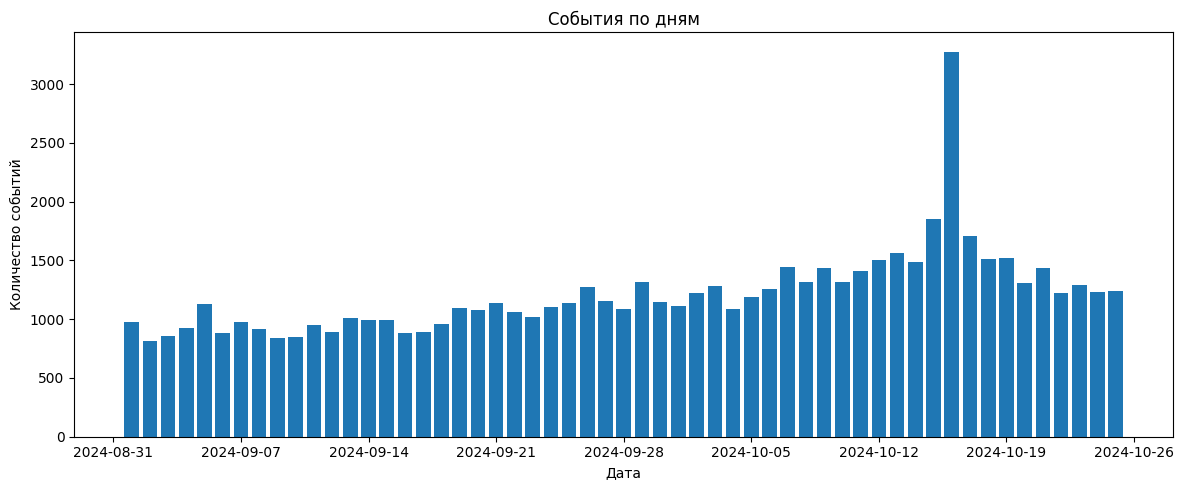

In [54]:
events_per_day = (
    buyer_stream.groupby("event_date_date").size().reset_index(name="total_events")
)

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(events_per_day["event_date_date"], events_per_day["total_events"])

ax.set_title("События по дням")
ax.set_xlabel("Дата")
ax.set_ylabel("Количество событий")

locator = mdates.DayLocator(interval=7)
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

### Количество уникальных пользователей по дням

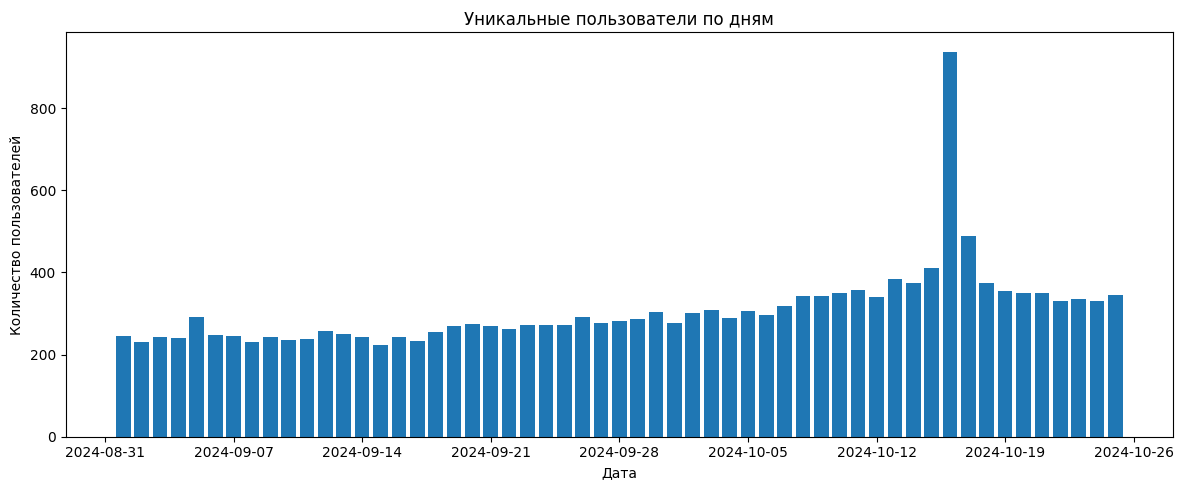

In [56]:
unique_users_per_day = (
    buyer_stream.groupby("event_date_date")["user_id"]
    .nunique()
    .reset_index(name="unique_users")
)

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(unique_users_per_day["event_date_date"], unique_users_per_day["unique_users"])

ax.set_title("Уникальные пользователи по дням")
ax.set_xlabel("Дата")
ax.set_ylabel("Количество пользователей")

locator = mdates.DayLocator(interval=7)
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

### Среднее число событий на пользователя в день

In [57]:
merged = pd.merge(events_per_day, unique_users_per_day, on="event_date_date")
merged["avg_events_per_user"] = merged["total_events"] / merged["unique_users"]


fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(merged["event_date_date"], merged["avg_events_per_user"])

ax.set_title("Среднее число событий на пользователя")
ax.set_xlabel("Дата")
ax.set_ylabel("Количество событий")

locator = mdates.DayLocator(interval=7)
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

### Распределение количества событий на пользователя

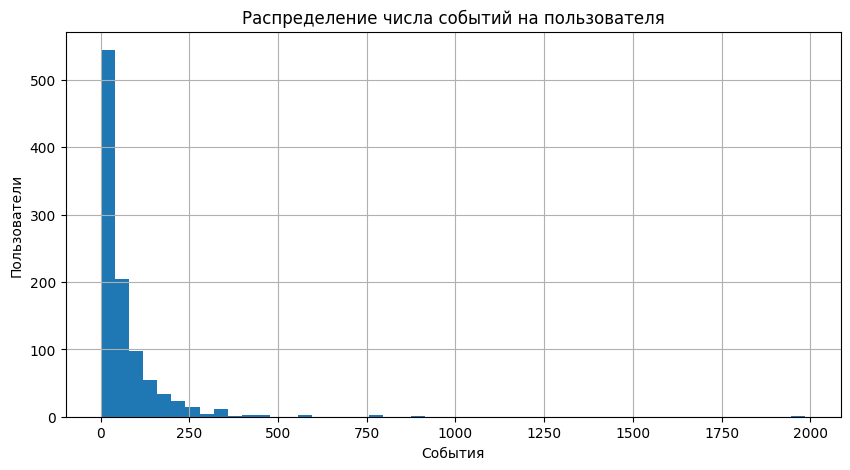

In [60]:
user_event_counts = buyer_stream["user_id"].value_counts()
user_event_counts.hist(bins=50, figsize=(10, 5))
plt.title("Распределение числа событий на пользователя")
plt.xlabel("События")
plt.ylabel("Пользователи")
plt.show()

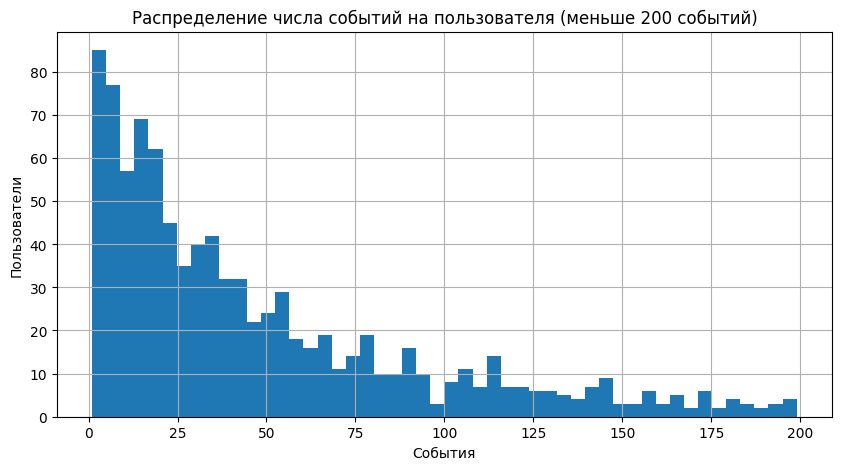

In [64]:
user_event_counts[user_event_counts < 200].hist(bins=50, figsize=(10, 5))
plt.title("Распределение числа событий на пользователя (меньше 200 событий)")
plt.xlabel("События")
plt.ylabel("Пользователи")
plt.show()

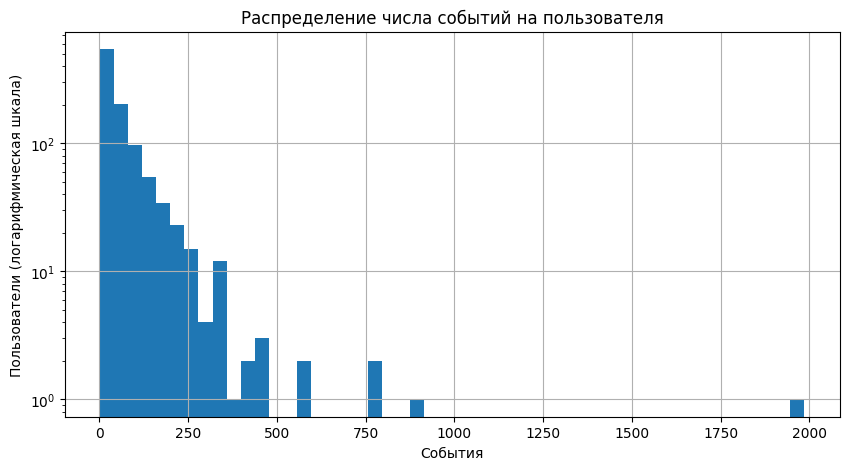

In [61]:
user_event_counts.hist(bins=50, log=True, figsize=(10, 5))
plt.title("Распределение числа событий на пользователя")
plt.xlabel("События")
plt.ylabel("Пользователи (логарифмическая шкала)")
plt.show()

### Распределение количества активных дней на пользователя

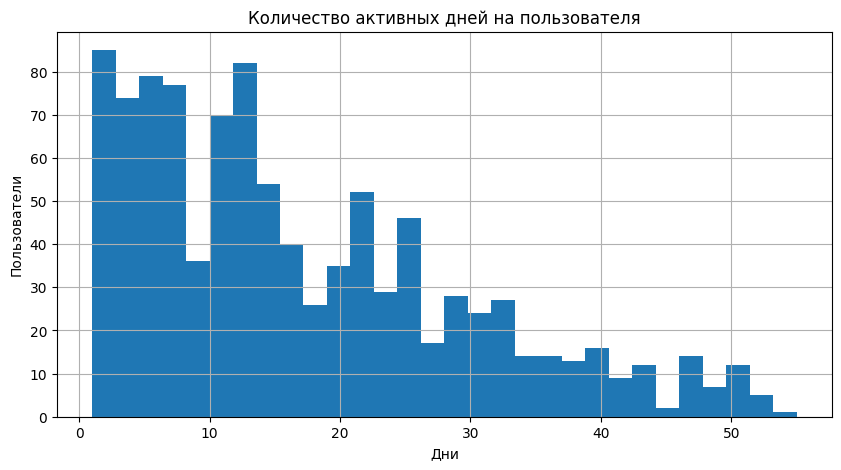

In [65]:
active_days = buyer_stream.groupby("user_id")["event_date_date"].nunique()
active_days.hist(bins=30, figsize=(10, 5))
plt.title("Количество активных дней на пользователя")
plt.xlabel("Дни")
plt.ylabel("Пользователи")
plt.show()

## Анализ типов событий

### Частота eid в логах

In [66]:
eid_counts = buyer_stream["eid"].value_counts().reset_index()
eid_counts.columns = ["eid", "count"]

In [76]:
eid_with_names = eid_counts.merge(
    events[["EventType_ext", "Name"]],
    left_on="eid",
    right_on="EventType_ext",
    how="left",
)
eid_with_names = eid_with_names.drop(columns=["EventType_ext"])
eid_with_names["short_name"] = eid_with_names["Name"].str.split("/").str[-1].str.strip()

In [77]:
pd.set_option("display.max_colwidth", None)
eid_with_names

,eid,count,Name,short_name
0,857,31026,Чат / События полученные через AMQP / Отправка текстового сообщения,Отправка текстового сообщения
1,4675,17418,Avito.Safedeal / Создание заказа на доставку / Контакт доставки,Контакт доставки
2,5942,6860,Avito.Marketplace / Корзина/ Добавление объявления в корзину,Добавление объявления в корзину
3,303,5365,Пользовательские события / Объявления / Просмотр телефона объявления,Просмотр телефона объявления
4,4813,3825,In App Calls / Контакт IAC (в различных сценариях),Контакт IAC (в различных сценариях)
5,3005,1083,Чат / Просмотр телефона в чате,Просмотр телефона в чате
6,4066,679,Чат / События полученные через AMQP / Отправка автоматически сформированного сообщения от одного пользователя другому,Отправка автоматически сформированного сообщения от одного пользователя другому
7,6154,185,"Календарь бронирования / Нажатие на кнопку ""Онлайн-запись""","Нажатие на кнопку ""Онлайн-запись"""
8,2581,104,RE STR / BX / Создание бронирования / Создание брони,Создание брони
9,856,2,Чат / События полученные через AMQP / Отправка прикреплённого объявления,Отправка прикреплённого объявления


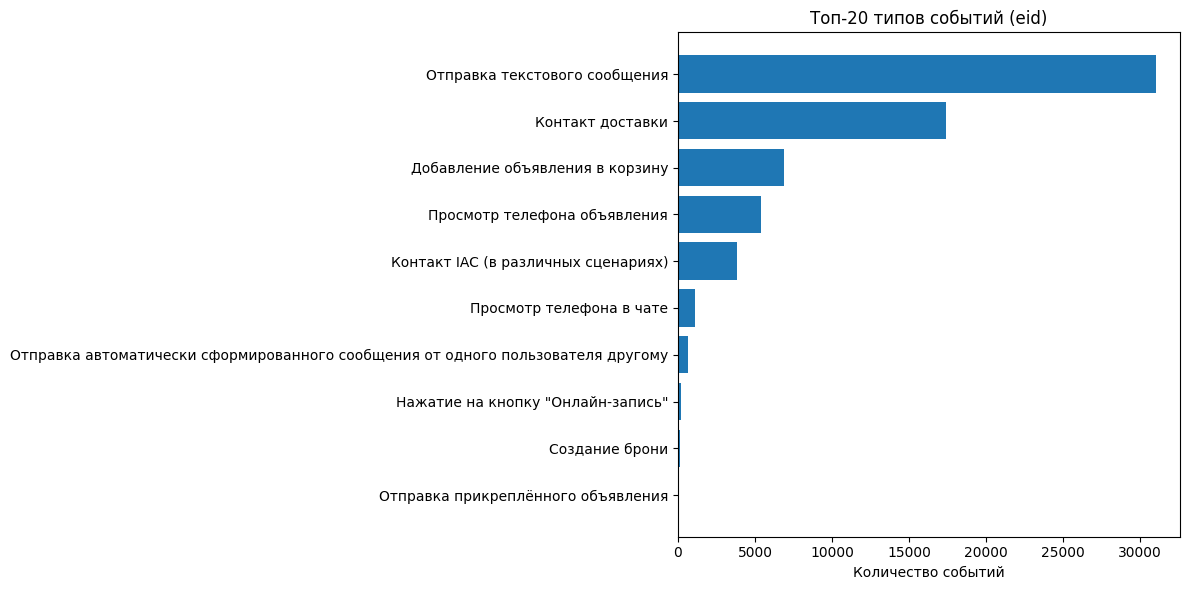

In [ ]:
top_eid = eid_with_names.head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_eid["short_name"], top_eid["count"])
plt.xlabel("Количество событий")
plt.title("Топ-20 типов событий (eid)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [80]:
total_events = eid_with_names["count"].sum()
eid_with_names["percent"] = 100 * eid_with_names["count"] / total_events

In [81]:
eid_with_names

,eid,count,Name,short_name,percent
0,857,31026,Чат / События полученные через AMQP / Отправка текстового сообщения,Отправка текстового сообщения,46.622688
1,4675,17418,Avito.Safedeal / Создание заказа на доставку / Контакт доставки,Контакт доставки,26.173982
2,5942,6860,Avito.Marketplace / Корзина/ Добавление объявления в корзину,Добавление объявления в корзину,10.308504
3,303,5365,Пользовательские события / Объявления / Просмотр телефона объявления,Просмотр телефона объявления,8.061971
4,4813,3825,In App Calls / Контакт IAC (в различных сценариях),Контакт IAC (в различных сценариях),5.747817
5,3005,1083,Чат / Просмотр телефона в чате,Просмотр телефона в чате,1.627421
6,4066,679,Чат / События полученные через AMQP / Отправка автоматически сформированного сообщения от одного пользователя другому,Отправка автоматически сформированного сообщения от одного пользователя другому,1.020331
7,6154,185,"Календарь бронирования / Нажатие на кнопку ""Онлайн-запись""","Нажатие на кнопку ""Онлайн-запись""",0.277999
8,2581,104,RE STR / BX / Создание бронирования / Создание брони,Создание брони,0.156281
9,856,2,Чат / События полученные через AMQP / Отправка прикреплённого объявления,Отправка прикреплённого объявления,0.003005


## Анализ категорий

In [96]:
category_counts = buyer_stream["category_id"].value_counts().reset_index()
category_counts.columns = ["category_id", "event_count"]
category_counts = category_counts.merge(
    categories[["microcat_ext", "microcat_name"]],
    left_on="category_id",
    right_on="microcat_ext",
    how="left",
)

In [102]:
category_counts["microcat_name"] = category_counts["microcat_name"].fillna(
    "unknown_microcat_name"
)

In [105]:
print("Количество уникальных категорий:", category_counts["category_id"].nunique())

Количество уникальных категорий: 50


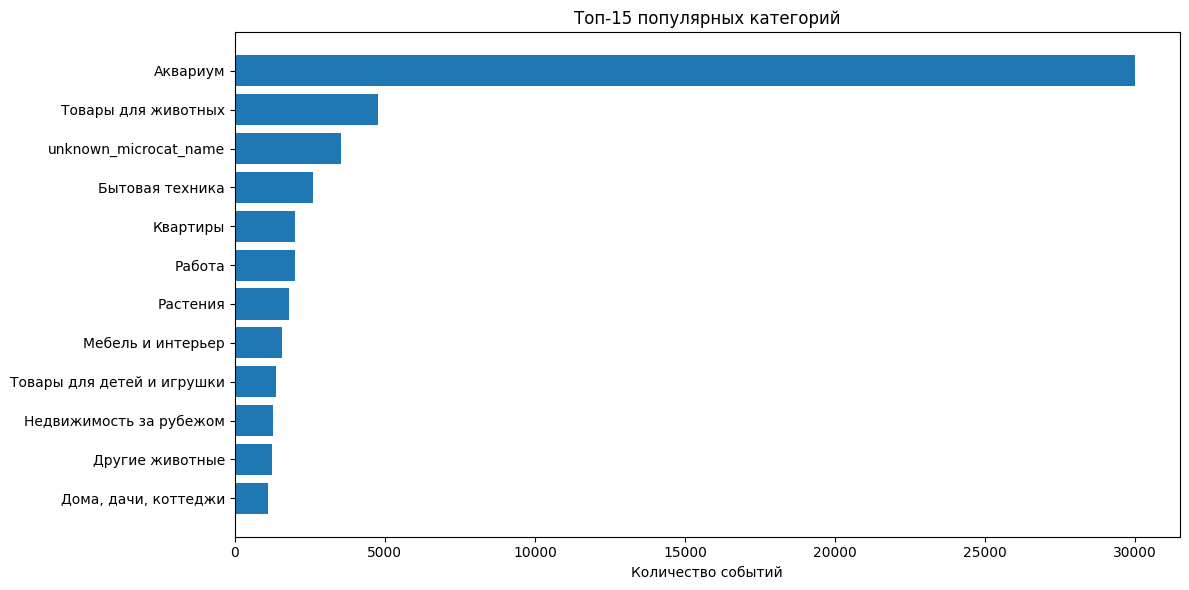

In [101]:
top_categories = category_counts.head(15)

plt.figure(figsize=(12, 6))
plt.barh(top_categories["microcat_name"], top_categories["event_count"])
plt.xlabel("Количество событий")
plt.title("Топ-15 популярных категорий")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()